In [13]:
import numpy as np
from astropy import units as u
from snewpy.models import presn, ccsn
from snewpy.neutrino import Flavor

import pylab as plt
from contextlib import contextmanager
plt.style.use('seaborn-talk')

/var/folders/4t/p2_knw3504lbc90bf1vzj4h00000gn/T/ipykernel_3798/2834227578.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


In [14]:
@contextmanager
def raises(exception):
    "A small utility to catch and show the exceptions"
    try:
        yield
    except exception as e:
        print(f'{exception.__name__}: {e}')
    

# Usage of flux.Container interface

## 1. Initialize model

In [3]:
#model = ccsn.Bollig_2016(progenitor_mass=27<<u.Msun)
model = presn.Odrzywolek_2010('../../models/presn-models/Odrzywolek_2010/s25_nuebar_data.txt')

times    = model.time #np.linspace(0,2,1500)<<u.second;
energies = np.linspace(0,50,501)<<u.MeV

In [4]:
print(times)
print(model)

[-6.829223e+11 -6.531065e+11 -6.276641e+11 ... -3.348399e-01 -1.279063e-01
 -0.000000e+00] s
Odrzywolek_2010 Model: s25_nuebar_data
Progenitor Mass  : 25.0 solMass


## 2. Calculate flux

In [5]:
flux = model.get_flux(t = times, E = energies, distance=0.6<<u.kpc)

## Working with the Container class

The container class is defined in `snewpy.flux.Container`

In [6]:
from snewpy.flux import Container

Container?

Init signature:
Container(
    data: astropy.units.quantity.Quantity,
    flavor: List[snewpy.neutrino.Flavor],
    time: typing.Annotated[astropy.units.quantity.Quantity, Unit("s")],
    energy: typing.Annotated[astropy.units.quantity.Quantity, Unit("MeV")],
    *,
    integrable_axes: Optional[Set[snewpy.flux.Axes]] = None,
)
Docstring:     
base class for internal use
:noindex:
Init docstring:
A container class storing the physical quantity (flux, fluence, rate...), which depends on flavor, time and energy.

Parameters
----------
data: :class:`astropy.Quantity`
    3D array of the stored quantity, must have dimensions compatible with (flavor, time, energy)

flavor: list of :class:`snewpy.neutrino.Flavor`
    array of flavors (should be ``len(flavor)==data.shape[0]``

time: array of :class:`astropy.Quantity`
    sampling points in time (then ``len(time)==data.shape[1]``) 
    or time bin edges (then ``len(time)==data.shape[1]+1``) 

energy: array of :class:`astropy.Quantity`
    samp

### Inspection

We will use the flux container, obtained from the SupernovaModel on the previous step.

On print the Container gives an output, describing it's `array` dimensions, unit (here it's `[1/(cm2 MeV s)]`), and the range of each of three axes: `flavor`, `time` and `energy`

In [25]:
print(flux)

d2FdEdT (4, 1034, 501) [1 / (MeV s cm2)]: <4 flavor(0;3) x 1034 time(-682922300000.0 s;-0.0 s) x 501 energy(0.0 MeV;50.0 MeV)>


One can access the array, as a `astropy.Quantity` object:

In [26]:
flux.array

<Quantity [[[0.00000000e+00, 2.93219362e-25, 1.38595838e-16, ...,
             0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
            [0.00000000e+00, 4.17517726e-25, 1.81094625e-16, ...,
             0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
            [0.00000000e+00, 5.65501931e-25, 2.27838473e-16, ...,
             0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
            ...,
            [0.00000000e+00, 1.59237480e+06, 9.82519417e+06, ...,
             1.32510178e-23, 1.12371666e-23, 9.52926476e-24],
            [0.00000000e+00, 1.66800277e+06, 1.00977182e+07, ...,
             4.65769851e-22, 3.97945572e-22, 3.39993833e-22],
            [0.00000000e+00, 1.75250646e+06, 1.03676168e+07, ...,
             1.12203031e-20, 9.65140344e-21, 8.30178509e-21]],

           [[0.00000000e+00, 1.05558970e-25, 4.98945016e-17, ...,
             0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
            [0.00000000e+00, 1.50306381e-25, 6.51940649e-17, ...,
             0.0000

and individual axes

In [27]:
flux.energy

<Quantity [ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,
            1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,
            2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,
            3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,
            4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,
            5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,
            6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,
            7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,
            8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,
            9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
           10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
           11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
           12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9,
           13. , 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9,
      

### Slicing

Flux can be sliced the same way as a usual np.array:

In [28]:
#get the flux for specific flavor
flux[Flavor.NU_E] 

d2FdEdT (1, 1034, 501) [1 / (MeV s cm2)]: <1 flavor(0;0) x 1034 time(-682922300000.0 s;-0.0 s) x 501 energy(0.0 MeV;50.0 MeV)>

In [29]:
#Or a trim the time or energy dimensions, 
#here we take first 1000 points in time
flux[:,:1000,:]

d2FdEdT (4, 1000, 501) [1 / (MeV s cm2)]: <4 flavor(0;3) x 1000 time(-682922300000.0 s;-84.49657 s) x 501 energy(0.0 MeV;50.0 MeV)>

### Summation

Container can be summed by any of the axes: `flavor`,`time`,`energy`.

In [30]:
#Sum over all flavors
flux.sum('flavor')

d2FdEdT (1, 1034, 501) [1 / (MeV s cm2)]: <2 flavor(0;3) x 1034 time(-682922300000.0 s;-0.0 s) x 501 energy(0.0 MeV;50.0 MeV)>

In [31]:
#trying to summ over time or flavor will raise an exception
with raises(ValueError):
    flux.sum('time')

ValueError: Cannot sum over time! Valid axes are {<Axes.flavor: 0>}


### Integration
Also it can be integrated (using linear interpolation between points)

In [32]:
#Integrate over the full range, if limits are not provided
flux.integrate('energy')

dFdT (4, 1034, 1) [1 / (s cm2)]: <4 flavor(0;3) x 1034 time(-682922300000.0 s;-0.0 s) x 2 energy(0.0 MeV;50.0 MeV)>

In [33]:
#Integrate over the first second of the flux
flux.integrate('time',limits=[-10,0]<<u.s)

dFdE (4, 1, 501) [1 / (MeV cm2)]: <4 flavor(0;3) x 2 time(-10.0 s;-0.0 s) x 501 energy(0.0 MeV;50.0 MeV)>

In [34]:
#Integrate over the several time bins
flux.integrate('time',limits=[-3,-2,-1,0]<<u.s)

dFdE (4, 3, 501) [1 / (MeV cm2)]: <4 flavor(0;3) x 4 time(-3.0 s;-0.0 s) x 501 energy(0.0 MeV;50.0 MeV)>

After integration, the time dimension of the array here is `len(limits)-1`
But the corresponding axis (in this case `time`) keeps all the limits (and here it has 4 points)

### "Summable" and "integrable" axes

Container will automatically watch which axes can be integrated, and which can only be summed over.

For example, the flux, obtained from the `SupernovaModel.get_flux` is differential over time and energy, which means it can be integrated over `energy` and `time`. 
You can see it from the class name `d2FdEdT` and the unit:

In [35]:
flux

d2FdEdT (4, 1034, 501) [1 / (MeV s cm2)]: <4 flavor(0;3) x 1034 time(-682922300000.0 s;-0.0 s) x 501 energy(0.0 MeV;50.0 MeV)>

Internally the axes which can be summed or integrated are kept in the private properties:

In [36]:
print(f'Can integrate over {flux._integrable_axes}')
print(f'Can sum over {flux._sumable_axes}')

Can integrate over {<Axes.time: 1>, <Axes.energy: 2>}
Can sum over {<Axes.flavor: 0>}


After the integration over the axis, it becomes "summable":

In [37]:
fI = flux.integrate('time',limits=[0,1,2,3]<<u.s)
print(f'Can integrate over {fI._integrable_axes}')
print(f'Can sum over {fI._sumable_axes}')

Can integrate over {<Axes.energy: 2>}
Can sum over {<Axes.flavor: 0>, <Axes.time: 1>}


In [38]:
#after we integrated over time we can sum over the time bins
fI.sum('time')

dFdE (4, 1, 501) [1 / (MeV cm2)]: <4 flavor(0;3) x 2 time(-0.0 s;-0.0 s) x 501 energy(0.0 MeV;50.0 MeV)>

In [39]:
#but cannot integrate over time again
with raises(ValueError):
    fI.integrate('time')

ValueError: Cannot integrate over time! Valid axes are {<Axes.energy: 2>}


**Note**: *integration changes the physical unit, summation or slicing do not*

### Integrate or sum (project?)

Sometimes you just want a projection of your flux to a specific axis (say, time).
In this case you want to integrate over energy if it's integrable, or just sum over the energy bins, if it is already integral flux:

In [40]:
assert fI.integrate_or_sum('energy') == fI.integrate('energy')
assert fI.integrate_or_sum('time') == fI.sum('time')

## 3. Calculate rate

I made a `RateCalculator` -  subclass of a `SimpleRate` (temporary solution for cleanness, we might merge them later).

The main difference - it uses `RateCalculator.run` function to calculate rates - multiplying flux by the cross-section, target number, smearing matrix and efficiency.

**Note** on the rate calculation:
In `SimpleRate` we used an input from `generate_fluence`, so the flux was already integrated within the energy bins, and the cross-section was sampled in the centers of energy bins.

In the `RateCalculator` we're multiplying the flux by the cross-section, and only after that we integrate over energy bins, so that should be more precise.

In [41]:
from snewpy.rate_calculator import RateCalculator
rc = RateCalculator()

Using snowglobes_data module ...


In [42]:
#calculate time differential rate 
rates = rc.run(flux, 'scint20kt')
rates['ibd']

/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:42: RuntimeWarning: divide by zero encountered in log
  xsecs = np.interp(np.log(E)/np.log(10), xp, yp, left=0, right=0)*E*1e-38 <<u.cm**2
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=ibd. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=nue_e. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channe

dNdT (1, 1034, 200) [1 / s]: <1 flavor(2;2) x 1034 time(-682922300000.0 s;-0.0 s) x 201 energy(0.25 MeV;100.25 MeV)>

`RateCalculator.run` outputs a dictionary of Container objects with rates for each channel

Since rhe rate calculation only operates on energy, the time structure remains the same: if it was flux (`1/(MeV cm2 s)`) the rate will be `1/s`

But if we pass a flux integrated over time (fluence), we get just number of events:

In [43]:
#calculate time integral rate 
fluence = flux.integrate('time', np.arange(-172800,0,172.8)<<u.s) #Ida:changed the time in array
ratesI = rc.run(fluence, 'scint20kt')
ratesI['ibd']

N (1, 999, 200) []: <1 flavor(2;2) x 1000 time(-172800.0 s;-172.8000000116299 s) x 201 energy(0.25 MeV;100.25 MeV)>

### Saving and loading

In [44]:
#Container can be saved to a file 
fluence.save('fluence.npz')
#and loaded using the class method
fluence1 = Container.load('fluence.npz')
assert fluence1 == fluence

fluence1

dFdE (4, 999, 501) [1 / (MeV cm2)]: <4 flavor(0;3) x 1000 time(-172800.0 s;-172.8000000116299 s) x 501 energy(0.0 MeV;50.0 MeV)>

## 4. Plotting examples

### Utility functions

In [45]:
#Utility function to draw the flux
from snewpy.flux import Axes

def project(flux, axis, integrate=True):
    axis = Axes[axis] #convert to enum
    integrate_axis = Axes.time 
    if axis == integrate_axis:
        integrate_axis = Axes.energy 
    fI = (flux.integrate if integrate else flux.sum)(integrate_axis)
    return fI.axes[axis], fI
    
def plot_projection(flux, axis, step=False, integrate=True):
    x,fI = project(flux,axis, integrate)
    y = fI.array.squeeze().T
    if step:
        #we're dealing with bins, not points
        l = plt.step(x[:-1], y, where='pre', label=[Flavor(flv).to_tex() for flv in flux.flavor])
    else:
        l = plt.plot(x, y, label=[Flavor(flv).to_tex() for flv in flux.flavor])
    
    plt.ylabel(f'{fI.__class__.__name__},  {y.unit}')
    plt.xlabel(f'{Axes[axis].name},  {x.unit}')
    return l


In [46]:
#Utility function to draw the 
def plot_rates(rates):
    for ch,r in rates.items():
        rT = r.sum('energy')

        plt.plot(rT.time, rT.array.squeeze(), label=ch)
    #plt.xlim(right=0.5)
    plt.ylabel(f'{rT.__class__.__name__},  {r.array.unit}')
    plt.xlabel(f'time, {rT.time.unit}')
    

### Plot fluxes

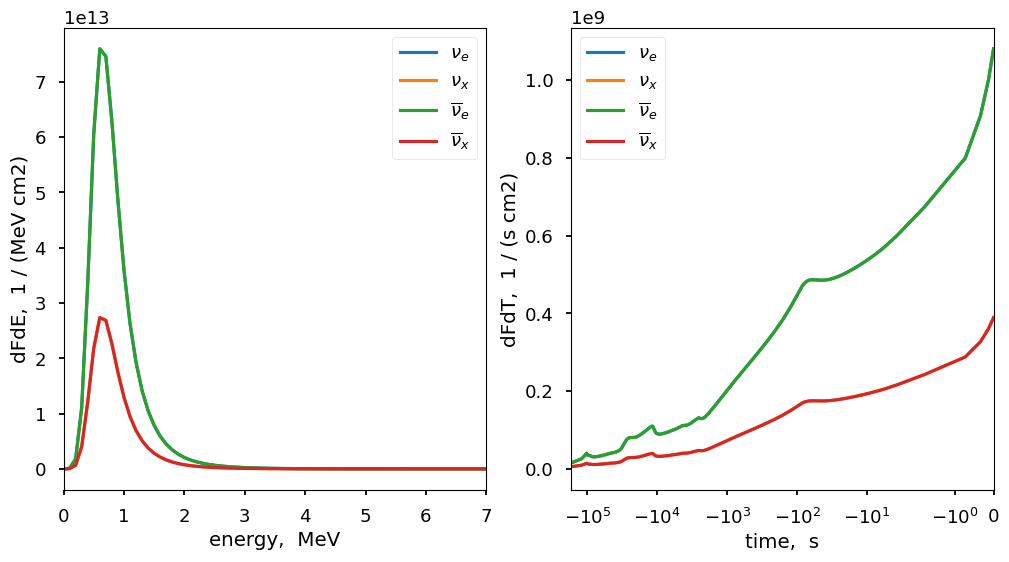

In [32]:
#plot the neutrino flux 
fig,ax = plt.subplots(1,2, figsize=(12,6))
plt.sca(ax[0])
plot_projection(flux, 'energy', integrate=True) #flux [:,1600:,:51]
plt.xlim(0,7) #ida added
plt.legend()

plt.sca(ax[1])
plot_projection(flux, 'time', integrate=True)
plt.xlim(-172000,0) #48 hours
plt.legend()
plt.xscale('symlog')
plt.show()

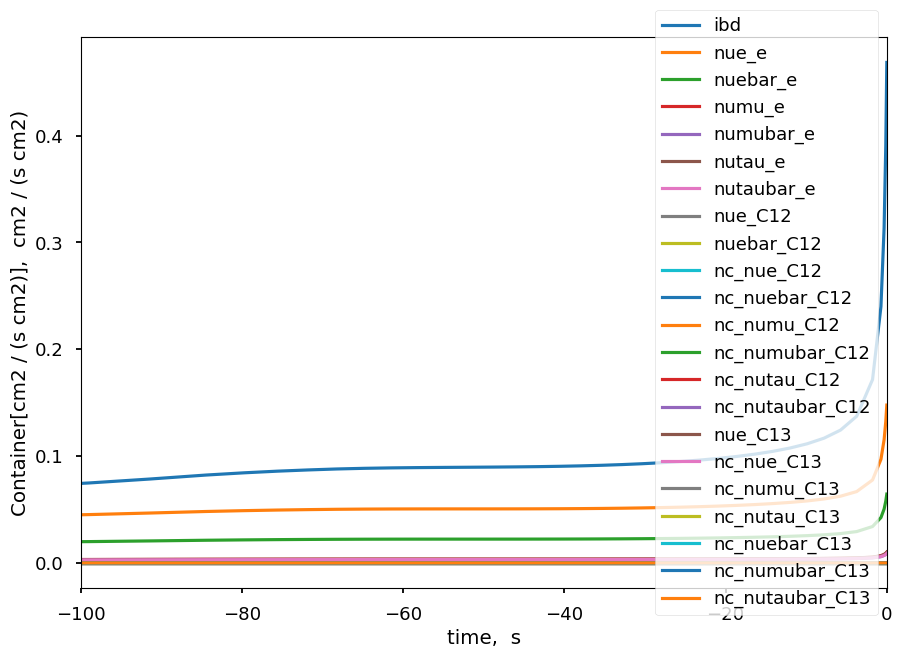

In [33]:
for ch, rate in rates.items():
    l = plot_projection(rate, 'time', integrate=False)
    l[0].set_label(ch)
#plt.yscale('log')
plt.legend(loc='right')
#plt.ylim(0.1)
plt.xlim(-100,0)
plt.show()

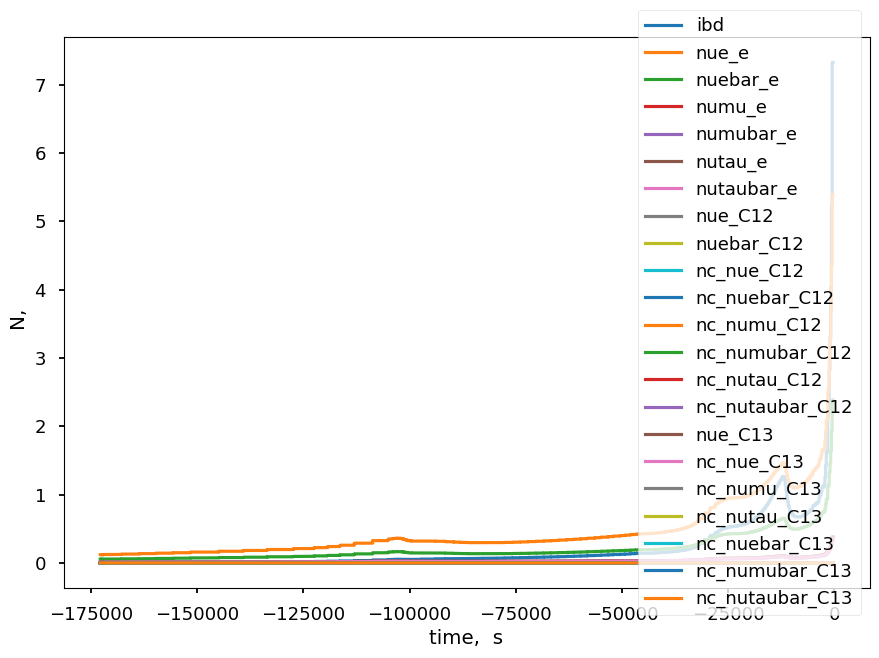

In [ ]:
for ch, rate in ratesI.items():
    l = plot_projection(rate, 'time', integrate=False, step=True)
    l[0].set_label(ch)
#plt.yscale('log')
plt.legend(loc='right')
plt.show()

# From here on: Ida-code

In [ ]:
#Ida test code!!!
print(type(rates['ibd']))

#Print first 10 elements of the data
print(rates['ibd'][:10])  # Prints the first 10 elements of the data

<class 'snewpy.flux.dNdT'>
dNdT (1, 1034, 200) [1 / s]: <1 flavor(2;2) x 1034 time(-682922300000.0 s;-0.0 s) x 201 energy(0.25 MeV;100.25 MeV)>


Ida test: Plot  Fig 5 (ish) from the KamLAND paper

In [ ]:
#calculate time integral rate 
#fluence = flux.integrate('time', np.arange(-172800,0,172.8)<<u.s) #Ida:changed the time in array
#ratesI = rc.run(fluence, 'scint20kt')
ibd_tot = ratesI['ibd']
print(ibd_tot)

N (1, 999, 200) []: <1 flavor(2;2) x 1000 time(-172800.0 s;-172.8000000116299 s) x 201 energy(0.25 MeV;100.25 MeV)>
N (1, 1, 200) []: <1 flavor(2;2) x 2 time(-172800.0 s;-172.8000000116299 s) x 201 energy(0.25 MeV;100.25 MeV)>


In [ ]:
summed_rates = {}

for ch, rate in ratesI.items():
    # Summing the rate values for the current channel
    summed_rate = rate.sum('time')
    summed_rates[ch] = summed_rate
    
ibd_sum = summed_rates['ibd']
print(ibd_sum)

N (1, 1, 200) []: <1 flavor(2;2) x 2 time(-172800.0 s;-172.8000000116299 s) x 201 energy(0.25 MeV;100.25 MeV)>


In [8]:
#Check unit of spectra
E = np.linspace(0,20,201) * u.MeV #energy points for integration
t = model.time

ispec = model.get_initial_spectra(t, E)

for flavor, spectra in ispec.items():
    print(f"Flavor: {flavor.name}")
    print(f"Spectra unit: {spectra.unit}")

Flavor: NU_E
Spectra unit: 1 / (MeV s)
Flavor: NU_X
Spectra unit: 1 / (MeV s)
Flavor: NU_E_BAR
Spectra unit: 1 / (MeV s)
Flavor: NU_X_BAR
Spectra unit: 1 / (MeV s)


### Plot Fig. 2 (top) from the KamLAND paper - luminosity
Description: Time evolution (48 h) of electron anti-neutrino luminosity 
Unit: erg/s = 10^-7 J /s 
Luminosity: J/s
Flux: 1/(s*cm^2)
Spectra: 1/(Mev * s)

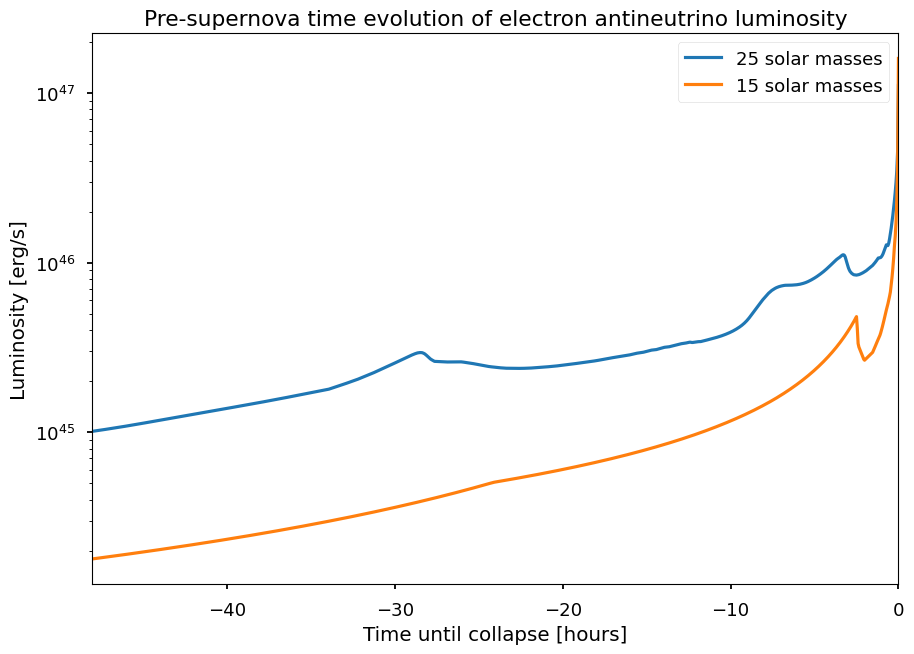

In [18]:
#IDA Figure 2 (top) from KamLAND paper
model_25 = presn.Odrzywolek_2010('../../models/presn-models/Odrzywolek_2010/s25_nuebar_data.txt')
model_15 =presn.Patton_2017('../../models/presn-models/Patton_2017/totalLuminosity_15SolarMass.dat')
E_3 = np.linspace(0,20,201) * u.MeV #energy points for integration

width_bins = (20/201)
luminosity_time = np.linspace(-172800,-1,1000)<<u.s

luminosity_values_tot_25 = []
luminosity_values_tot_15 = []
spectra_3 = []
tot_luminosity=0

for t in luminosity_time:
    spectra = model_25.get_initial_spectra(t, E_3, flavors = [Flavor.NU_E_BAR])
    differential_luminosity = (spectra.get(2)[0] * (E_3)).value * 1.602 * 10**-6
    luminosity = differential_luminosity * width_bins
    tot_luminosity = np.sum(luminosity)
    luminosity_values_tot_25.append(tot_luminosity)

for t in luminosity_time:
    spectra = model_15.get_initial_spectra(t, E_3, flavors = [Flavor.NU_E_BAR])
    differential_luminosity = (spectra.get(2)[0] * (E_3)).value * 1.602 * 10**-6
    luminosity = differential_luminosity * width_bins
    tot_luminosity = np.sum(luminosity)
    luminosity_values_tot_15.append(tot_luminosity)


luminosity_time_3 = luminosity_time.to(u.hour)
plt.plot(luminosity_time_3,luminosity_values_tot_25, label = '25 solar masses')
plt.plot(luminosity_time_3,luminosity_values_tot_15, label = '15 solar masses')
plt.yscale("log")
plt.legend()
plt.title('Pre-supernova time evolution of electron antineutrino luminosity')
plt.xlim(-48,0)
plt.ylabel("Luminosity [erg/s]")
plt.xlabel("Time until collapse [hours]")
plt.show()

### Plot Fig. 2 (middle) from the KamLAND paper - average energy

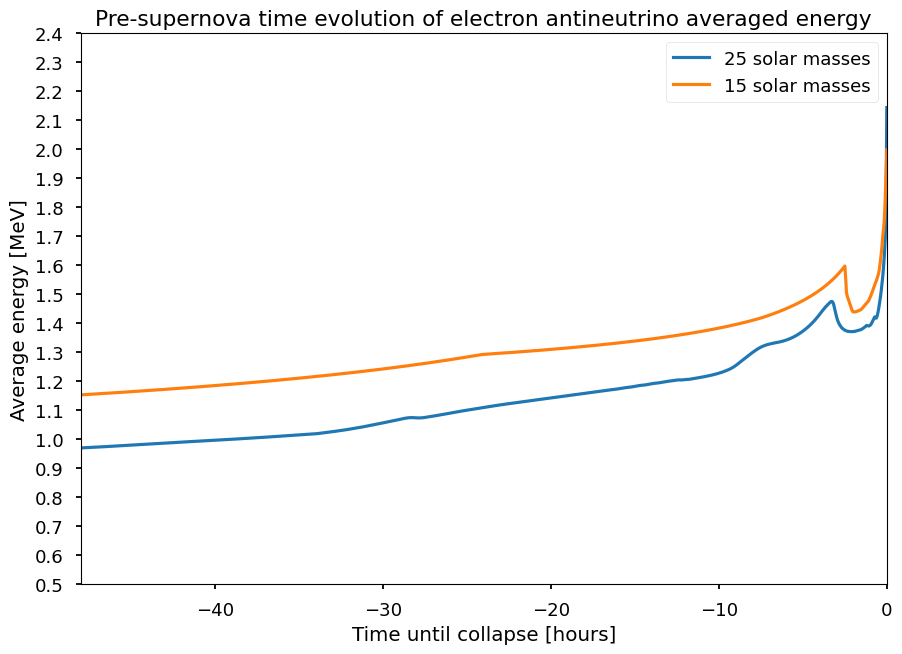

In [20]:
#IDA Figure 2 (middle) from KamLAND paper
#model_15 = presn.Odrzywolek_2010('../../models/presn-models/Odrzywolek_2010/s15_nuebar_data.txt')
E_3 = np.linspace(0,20,201) * u.MeV #energy points for integration

width_bins = (20/200)
luminosity_time = np.linspace(-172800,-1,1000)<<u.s

average_energy_25 = []
average_energy_15 = []


for t in luminosity_time:
    spectra = model_25.get_initial_spectra(t, E_3, flavors = [Flavor.NU_E_BAR])
    for energy in E_3:
        energy_f = (spectra.get(2)[0] * (E_3)).value
    average_energy = np.sum(energy_f) / np.sum(spectra.get(2)[0].value)
    average_energy_25.append(average_energy)


for t in luminosity_time:
    spectra = model_15.get_initial_spectra(t, E_3, flavors = [Flavor.NU_E_BAR])
    for energy in E_3:
        energy_f = (spectra.get(2)[0] * (E_3)).value
    average_energy = np.sum(energy_f) / np.sum(spectra.get(2)[0].value)
    average_energy_15.append(average_energy)



luminosity_time_3 = luminosity_time.to(u.hour)
plt.plot(luminosity_time_3, average_energy_25, label = '25 solar masses')
plt.plot(luminosity_time_3, average_energy_15, label = '15 solar masses')
#plt.yscale("log")
plt.legend()
plt.title('Pre-supernova time evolution of electron antineutrino averaged energy')
plt.xlim(-48,0)
plt.yticks(np.arange(0.5, 2.5, 0.1))
plt.ylabel("Average energy [MeV]")
plt.xlabel("Time until collapse [hours]")
plt.show()

### Plot Fig.3 from the KamLAND paper - PreSN event spectrum

In [1]:
#Copied from usage notebook
from astropy import units as u
import matplotlib.pyplot as plt
import numpy as np

from snewpy import snowglobes

SNOwGLoBES_path = None  # to use custom SNOwGLoBES detector/channel/smearing files, set SNOwGLoBES directory
SNEWPY_models_base = "../../models/"  # directory containing SNEWPY models

In [2]:
#General parameters
# set distance in kpc
distance = 0.2

# set SNOwGLoBES detector to use
detector = "scint20kt"

# set SNEWPY model type and filename
modeltype = 'Odrzywolek_2010'

# set desired flavor transformation
transformation = 'AdiabaticMSW_NMO'
transformation_INV = 'AdiabaticMSW_IMO'

# Option 2 - specify single tstart and tend, this makes 1 fluence file integrated over the window
tstart = -172800 * u.s
tend = 0.8 * u.s

# Option 3 = specify sequence of time intervals, one fluence file is made for each interval
#window_tstart = -172800
#window_tend = 0
#window_bins = 1000
#tstart = np.linspace(window_tstart, window_tend, window_bins, endpoint=False) * u.s
#tend = tstart + (window_tend - window_tstart) / window_bins * u.s
#tmid = (tstart + tend) * 0.5

In [3]:
#15 solar masses, normal mass ordering
model = 's15_nuebar_data'
modelfile = SNEWPY_models_base + "presn-models/" + modeltype + "/" + model + '.txt'
outfile = modeltype+"_"+model+"_"+transformation

In [4]:
#25 solar masses, normal mass ordering
model_25 = 's25_nuebar_data'
modelfile_25 = SNEWPY_models_base + "presn-models/" + modeltype + "/" + model_25 + '.txt'
outfile_25 = modeltype+"_"+model_25+"_"+transformation

In [5]:
#15 solar masses, inverted mass ordering
model = 's15_nuebar_data'
modelfile = SNEWPY_models_base + "presn-models/" + modeltype + "/" + model + '.txt'
outfile_INV = modeltype+"_"+model+"_"+transformation_INV

In [6]:
#25 solar masses, inverted mass ordering
model_25 = 's25_nuebar_data'
modelfile_25 = SNEWPY_models_base + "presn-models/" + modeltype + "/" + model_25 + '.txt'
outfile_25_INV = modeltype+"_"+model_25+"_"+transformation_INV

In [7]:
#Generate 25 solar masses, inverted
print("Preparing fluences ...")
tarredfile_25_INV = snowglobes.generate_fluence(modelfile_25, modeltype, transformation_INV, distance, outfile_25_INV, tstart, tend)

# Next, we run SNOwGLoBES. This will loop over all the fluence files in `tarredfile`.
print("Running SNOwGLoBES ...")
snowglobes.simulate(SNOwGLoBES_path, tarredfile_25_INV, detector_input=detector)

# Finally, we collate SNOwGLoBES’ results into a dictionary
print("Collating results ...")
tables_25_INV = snowglobes.collate(SNOwGLoBES_path, tarredfile_25_INV, skip_plots=True)

Preparing fluences ...
Running SNOwGLoBES ...
Using snowglobes_data module ...


/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=ibd. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=nue_e. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=nuebar_e. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:16

Collating results ...


In [8]:
#Generate 15 solar masses, inverted
print("Preparing fluences ...")
tarredfile_INV = snowglobes.generate_fluence(modelfile, modeltype, transformation_INV, distance, outfile_INV, tstart, tend)

# Next, we run SNOwGLoBES. This will loop over all the fluence files in `tarredfile`.
print("Running SNOwGLoBES ...")
snowglobes.simulate(SNOwGLoBES_path, tarredfile_INV, detector_input=detector)

# Finally, we collate SNOwGLoBES’ results into a dictionary
print("Collating results ...")
tables_INV = snowglobes.collate(SNOwGLoBES_path, tarredfile_INV, skip_plots=True)

Preparing fluences ...
Running SNOwGLoBES ...
Using snowglobes_data module ...


/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=ibd. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=nue_e. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=nuebar_e. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:16

Collating results ...


In [9]:
#Generate 25 solar masses, normal
print("Preparing fluences ...")
tarredfile_25 = snowglobes.generate_fluence(modelfile_25, modeltype, transformation, distance, outfile_25, tstart, tend)

# Next, we run SNOwGLoBES. This will loop over all the fluence files in `tarredfile`.
print("Running SNOwGLoBES ...")
snowglobes.simulate(SNOwGLoBES_path, tarredfile_25, detector_input=detector)

# Finally, we collate SNOwGLoBES’ results into a dictionary
print("Collating results ...")
tables_25 = snowglobes.collate(SNOwGLoBES_path, tarredfile_25, skip_plots=True)

Preparing fluences ...
Running SNOwGLoBES ...
Using snowglobes_data module ...


/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=ibd. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=nue_e. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=nuebar_e. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:16

Collating results ...


In [10]:
#Generate 15 solar masses, normal
print("Preparing fluences ...")
tarredfile = snowglobes.generate_fluence(modelfile, modeltype, transformation, distance, outfile, tstart, tend)

# Next, we run SNOwGLoBES. This will loop over all the fluence files in `tarredfile`.
print("Running SNOwGLoBES ...")
snowglobes.simulate(SNOwGLoBES_path, tarredfile, detector_input=detector)

# Finally, we collate SNOwGLoBES’ results into a dictionary
print("Collating results ...")
tables = snowglobes.collate(SNOwGLoBES_path, tarredfile, skip_plots=True)

Preparing fluences ...
Running SNOwGLoBES ...
Using snowglobes_data module ...


/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=ibd. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=nue_e. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=nuebar_e. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:16

Collating results ...


In [28]:
print(list(tables.keys()))

['scint20kt', 'Collated_Odrzywolek_2010_s15_nuebar_data_AdiabaticMSW_NMO_scint20kt_events_smeared_weighted.dat', 'Collated_Odrzywolek_2010_s15_nuebar_data_AdiabaticMSW_NMO_scint20kt_events_unsmeared_weighted.dat']


In [29]:
print(type(tables))

<class 'dict'>


In [30]:
key = 'Collated_Odrzywolek_2010_s15_nuebar_data_AdiabaticMSW_NMO_scint20kt_events_smeared_weighted.dat'

print(f"Energy bins (in MeV):\n{tables[key]['data'][0][:12]}")

for i, channel in enumerate(tables[key]['header'].split()[1:]):

    print(f"Number of {channel} events in those energy bins:\n{tables[key]['data'][i+1][:12]}")

Energy bins (in MeV):
[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6. ]
Number of ibd events in those energy bins:
[  0.           0.         106.64999935 196.60997974 191.50085925
 138.73458975  85.39127823  47.65270037  24.90121     12.40059169
   5.99641111   2.83326325]
Number of nue_C12 events in those energy bins:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.82319981e-15 6.26511798e-13 3.74391690e-12]
Number of nue_C13 events in those energy bins:
[3.70902729e-02 2.68966489e-02 1.63620477e-02 9.13178880e-03
 4.76981742e-03 2.41205125e-03 1.17688367e-03 5.65802150e-04
 2.66123235e-04 1.24389113e-04 5.73604839e-05 2.64198484e-05]
Number of nuebar_C12 events in those energy bins:
[0.00000000e+00 0.00000000e+00 4.38761013e-12 4.53843466e-11
 7.24911252e-11 5.90545490e-11 3.89507308e-11 2.35520792e-11
 1.35148346e-11 7.80452813e-12 3.04712142e-12 2.94120398e-13]
Number of nc events in those 

In [31]:
# Get the table corresponding to the given key
table = tables[key]['data']

# Extract the energy bins from the first row (assuming it contains energy bin information)
energy_bins = table[0][:12]  # Change the slicing range if there are more/less than 12 energy bins

# Initialize a list to store the total number of events for each energy bin
total_events_per_bin = [0] * len(energy_bins)

# Iterate through the remaining rows (interaction channels)
for row in table[1:]:
    # Extract the events for the current interaction channel
    events = row[:12]  # Change the slicing range if there are more/less than 12 energy bins

    # Sum the events for each energy bin and add it to the corresponding total
    total_events_per_bin = [total_events_per_bin[i] + int(events[i]) for i in range(len(events))]

# Print the total number of events for the first energy bin
print("Total events for the first energy bin:", total_events_per_bin[0])

Total events for the first energy bin: 687


In [32]:
import numpy as np


table = tables[key]['data']

# Extract the energy bins from the first row (assuming it contains energy bin information)
energy_bins = table[0][:12]  # Change the slicing range if there are more/less than 12 energy bins

# Initialize a NumPy array to store the total number of events for each energy bin
total_events_per_bin = np.zeros(12)

# Iterate through the remaining rows (interaction channels)
for row in table[1:]:
    # Extract the events for the first 12 energy bins
    events = row[:12]  # Change the slicing range if there are more/less than 12 energy bins

    # Sum the events for each energy bin and add it to the corresponding total
    total_events_per_bin += np.array(events)

# Print the total events for the first 12 energy bins
print("Total events for the first 12 energy bins:", total_events_per_bin)
total_events_per_bin_divided = total_events_per_bin / energy_bins

print("Total events divided by corresponding energy bins:", total_events_per_bin_divided)

Total events for the first 12 energy bins: [687. 447. 356. 315. 241. 158.  92.  49.  25.  12.   5.   2.]
Total events divided by corresponding energy bins: [1.37400000e+03 4.47000000e+02 2.37333333e+02 1.57500000e+02
 9.64000000e+01 5.26666667e+01 2.62857143e+01 1.22500000e+01
 5.55555556e+00 2.40000000e+00 9.09090909e-01 3.33333333e-01]


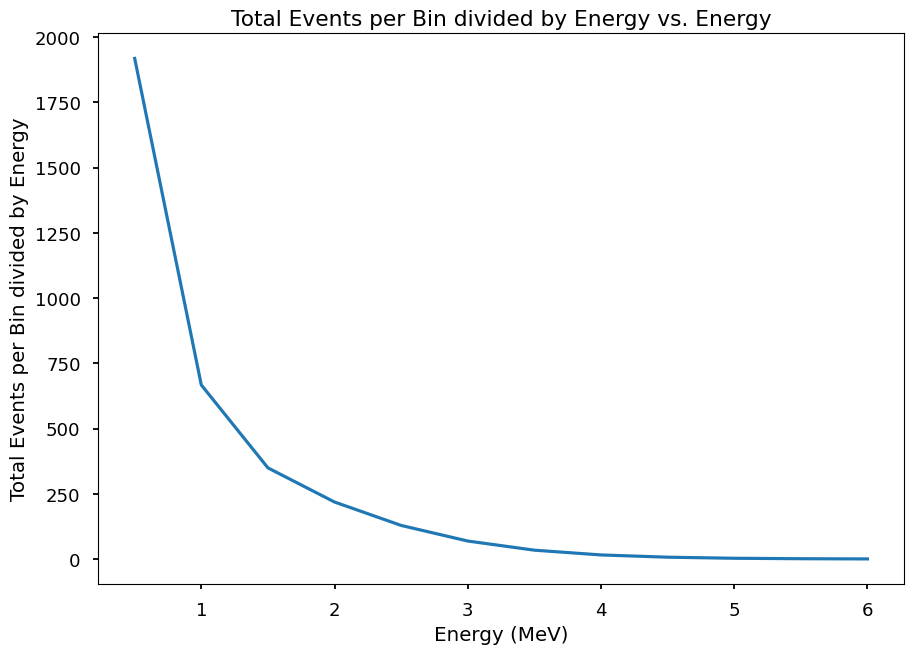

In [17]:
# Plot the results
plt.plot(energy_bins, total_events_per_bin_divided)
plt.xlabel('Energy (MeV)')
plt.ylabel('Total Events per Bin divided by Energy')
plt.title('Total Events per Bin divided by Energy vs. Energy')
plt.show()

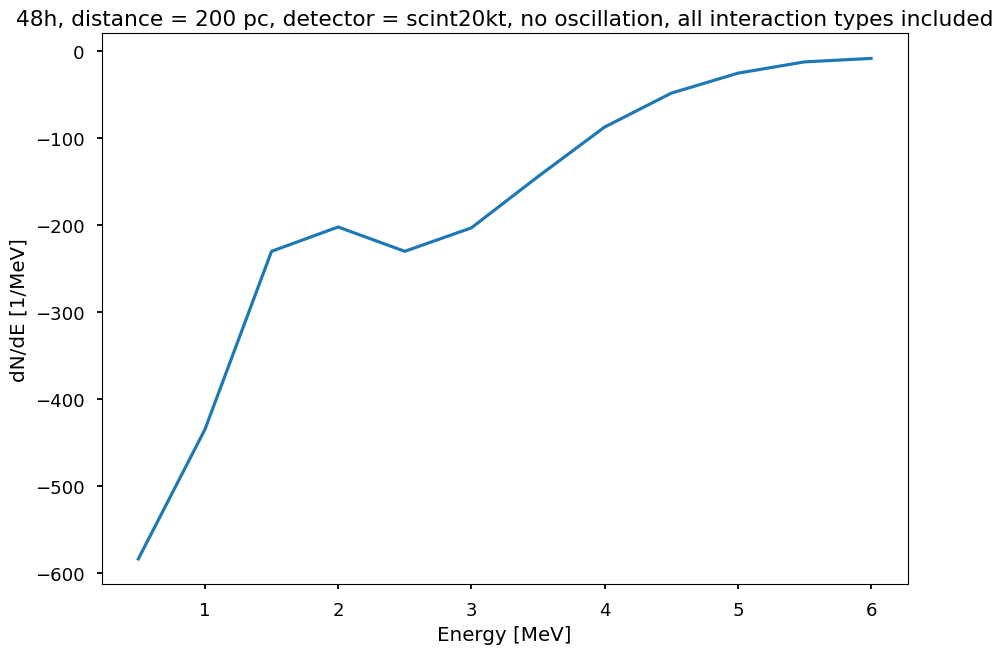

In [18]:
import numpy as np
import matplotlib.pyplot as plt


table = tables[key]['data']
energy_bins = table[0][:12] 

#Array to store total events
total_events_per_bin = np.zeros(12)

for row in table[1:]:
    events = row[:12] 

    total_events_per_bin += np.array(events)


energy_step = energy_bins[1] - energy_bins[0]

#Calculate gradient
dN_dE = np.gradient(total_events_per_bin, energy_step)


plt.plot(energy_bins, dN_dE)
plt.xlabel('Energy [MeV]')
plt.ylabel('dN/dE [1/MeV]')
plt.title('48h, distance = 200 pc, detector = scint20kt, no oscillation, all interaction types included')
plt.show()

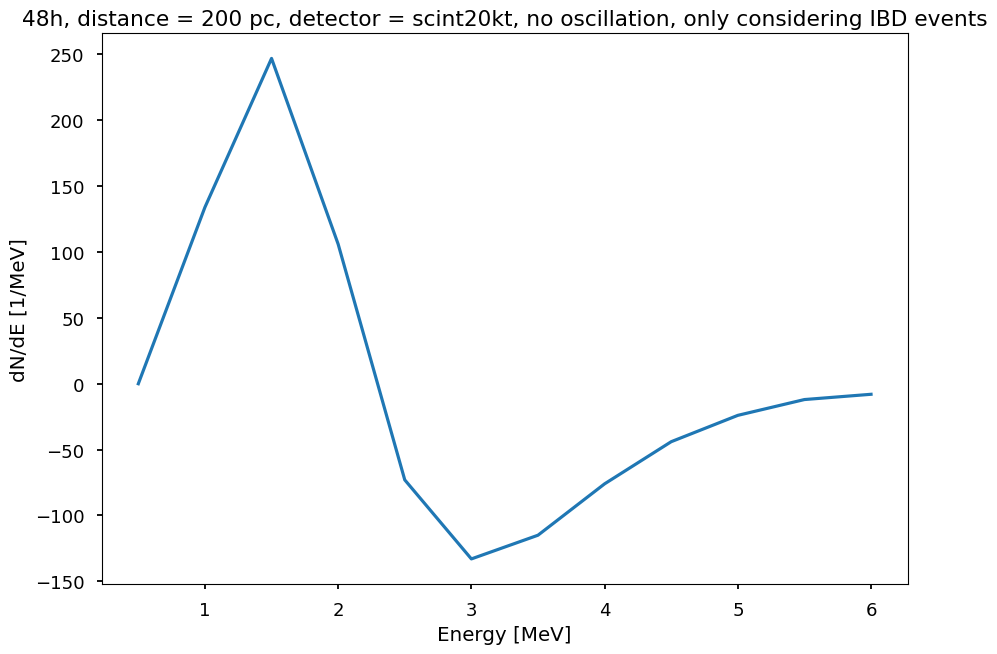

In [19]:
import numpy as np
import matplotlib.pyplot as plt


table = tables[key]['data']
energy_bins = table[0][:12] 

#Finding the ibd channel
ibd_channel_idx = None
for idx, channel in enumerate(tables[key]['header'].split()[1:]):
    if channel == 'ibd':
        ibd_channel_idx = idx + 1
        break


#First 12 elements in ibd
events_ibd = table[ibd_channel_idx][:12]

#Calculate gradient
energy_step = energy_bins[1] - energy_bins[0]
dN_dE = np.gradient(np.array(events_ibd), energy_step)


plt.plot(energy_bins, dN_dE)
plt.xlabel('Energy [MeV]')
plt.ylabel('dN/dE [1/MeV]')
plt.title('48h, distance = 200 pc, detector = scint20kt, no oscillation, only considering IBD events')
#plt.title('Differential Event Rate for IBD Channel vs. Energy')
plt.show()


In [47]:
print(list(tables_25_INV.keys()))

['scint20kt', 'Collated_Odrzywolek_2010_s25_nuebar_data_AdiabaticMSW_IMO_scint20kt_events_smeared_weighted.dat', 'Collated_Odrzywolek_2010_s25_nuebar_data_AdiabaticMSW_IMO_scint20kt_events_unsmeared_weighted.dat']


In [11]:
#KEYS
key = 'Collated_Odrzywolek_2010_s15_nuebar_data_AdiabaticMSW_NMO_scint20kt_events_smeared_weighted.dat'
key_25 = 'Collated_Odrzywolek_2010_s25_nuebar_data_AdiabaticMSW_NMO_scint20kt_events_smeared_weighted.dat'
key_INV = 'Collated_Odrzywolek_2010_s15_nuebar_data_AdiabaticMSW_IMO_scint20kt_events_smeared_weighted.dat'
key_25_INV = 'Collated_Odrzywolek_2010_s25_nuebar_data_AdiabaticMSW_IMO_scint20kt_events_smeared_weighted.dat'

Text(0, 0.5, 'dN/dE')

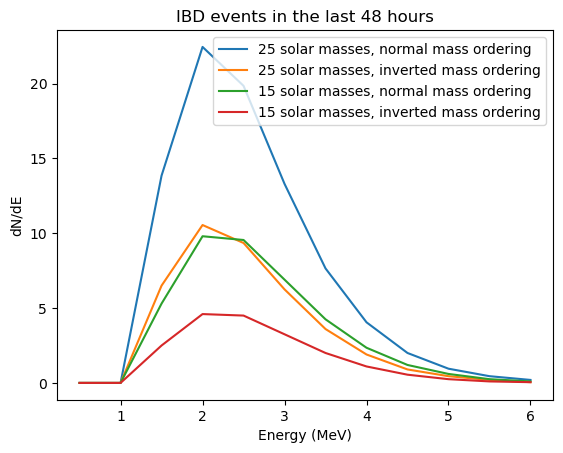

In [12]:
#25 solar masses normal
table_25 = tables_25[key_25]['data']

energy_bins_25 = table_25[0][:12] 
ibd_channel_idx_25 = None
for idx, channel in enumerate(tables_25[key_25]['header'].split()[1:]):
    if channel == 'ibd':
        ibd_channel_idx_25 = idx + 1
        break

events_ibd_25 = table_25[ibd_channel_idx_25][:12]
events25_divided_by_20 = np.array(events_ibd_25) / 20.0

#25 solar masses inverted
table_25_INV = tables_25_INV[key_25_INV]['data']

energy_bins_25_INV = table_25_INV[0][:12] 
ibd_channel_idx_25_INV = None
for idx, channel in enumerate(tables_25_INV[key_25_INV]['header'].split()[1:]):
    if channel == 'ibd':
        ibd_channel_idx_25_INV = idx + 1
        break

events_ibd_25_INV = table_25_INV[ibd_channel_idx_25_INV][:12]
events25_INV_divided_by_20 = np.array(events_ibd_25_INV)/ 20.0

#15 solar masses inverted
table_INV = tables_INV[key_INV]['data']

energy_bins_INV = table_INV[0][:12] 
ibd_channel_idx_INV = None
for idx, channel in enumerate(tables_INV[key_INV]['header'].split()[1:]):
    if channel == 'ibd':
        ibd_channel_idx_INV = idx + 1
        break

events_ibd_INV = table_INV[ibd_channel_idx_INV][:12]
events_INV_divided_by_20 = np.array(events_ibd_INV) / 20.0

#15 solar masses normal
table = tables[key]['data']

energy_bins = table[0][:12] 
ibd_channel_idx = None
for idx, channel in enumerate(tables[key]['header'].split()[1:]):
    if channel == 'ibd':
        ibd_channel_idx = idx + 1
        break

events_ibd = table[ibd_channel_idx][:12]
events_divided_by_20 = np.array(events_ibd)/ 20.0

plt.title('IBD events in the last 48 hours')
plt.plot(energy_bins, events25_divided_by_20, label = '25 solar masses, normal mass ordering')
plt.plot(energy_bins, events25_INV_divided_by_20, label = '25 solar masses, inverted mass ordering')
plt.plot(energy_bins, events_divided_by_20, label = '15 solar masses, normal mass ordering')
plt.plot(energy_bins, events_INV_divided_by_20, label = '15 solar masses, inverted mass ordering')
plt.legend()
plt.xlabel('Energy (MeV)')
plt.ylabel('dN/dE')

In [36]:
# Key for first time bin

# use `print(list(tables.keys()))` to see how to replace this in your particular case

key = 'Collated_Odrzywolek_2010_s15_nuebar_data_NoTransformation_0_scint20kt_events_smeared_weighted.dat'

# Assuming you have already defined the 'tables' dictionary and 'key' variable correctly

# Initialize a variable to store the sum of first elements in each channel
total_sum = 0

# Split the header by whitespace and skip the first element since it seems to be a label
channels = tables[key]['header'].split()[1:]

for channel in channels:
    # Assuming each channel is a list or iterable, extract the first element
    first_element = channel[0]

    try:
        # Try converting the first element to a float
        first_element_float = float(first_element)

        # Add the first element to the total sum
        total_sum += first_element_float

    except ValueError:
        # If the conversion to float fails, skip this element and continue with the next one
        continue

# Print the result
print("Total sum of first elements in each channel:", total_sum)


Total sum of first elements in each channel: 0


In [35]:
# Assuming you have already defined the 'tables' dictionary and 'key' variable correctly
key = 'Collated_Odrzywolek_2010_s15_nuebar_data_NoTransformation_0_scint20kt_events_smeared_weighted.dat'
# Initialize a variable to store the sum of 12th elements in each channel
total_sum = 0

# Split the header by whitespace and skip the first element since it seems to be a label
channels = tables[key]['header'].split()[1:]

for channel in channels:
    # Assuming each channel is a list or iterable, extract the 12th element
    elements = channel.split(',')  # Assuming elements are comma-separated, adjust delimiter as needed
    if len(elements) >= 12:
        twelfth_element = elements[11]

        try:
            # Try converting the 12th element to a float
            twelfth_element_float = float(twelfth_element)

            # Add the 12th element to the total sum
            total_sum += twelfth_element_float

        except ValueError:
            # If the conversion to float fails, skip this element and continue with the next one
            continue

# Print the result
print("Total sum of 12th elements in each channel:", total_sum)

Total sum of 12th elements in each channel: 0


In [15]:
print(tables)

{'scint20kt': {}, 'Collated_Odrzywolek_2010_s15_nuebar_data_NoTransformation_0_scint20kt_events_smeared_weighted.dat': {'header': 'Energy ibd nue_C12 nue_C13 nuebar_C12 nc e', 'data': array([[5.00000000e-01, 1.00000000e+00, 1.50000000e+00, ...,
        9.90000000e+01, 9.95000000e+01, 1.00000000e+02],
       [0.00000000e+00, 0.00000000e+00, 4.54482098e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.91678650e-01, 2.60344129e-01, 1.33838232e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])}, 'Collated_Odrzywolek_2010_s15_nuebar_data_NoTransformation_0_scint20kt_events_unsmeared_weigh

In [47]:
#Copied from usage files
%matplotlib inline
nevents = np.zeros(len(tmid))
for i in range(len(tmid)):
    key = f"Collated_{outfile}_{i}_{detector}_events_smeared_weighted.dat"
    for j in range(1,len(tables[key]['header'].split())):
        nevents[i] += sum(tables[key]['data'][j])

# nevents is per bin, convert to per ms
factor = window_bins / (window_tend - window_tstart) / 1000

plt.plot(tmid, nevents * factor)
plt.xlabel("$t$ [s]")
plt.ylabel("Counts [ms$^{-1}$]")
plt.show()
# compare to Figure 5 of Zha et al. (2021)
print("Total Events:", sum(nevents))

KeyError: 'Collated_Odrzywolek_2010_s15_nuebar_data_NoTransformation_0_scint20kt_events_smeared_weighted.dat'

### Plot Fig.5 from the KamLAND paper - IBD events detected

In [23]:
# Assuming you have already defined the 'tables' dictionary and 'key' variable correctly

# Get the table corresponding to the given key
table = tables[key]['data']

# Find the index corresponding to the 'ibd' channel (assuming 'ibd' exists in the table)
ibd_channel_idx = None
for idx, channel in enumerate(tables[key]['header'].split()[1:]):
    if channel == 'ibd':
        ibd_channel_idx = idx + 1
        break

if ibd_channel_idx is None:
    print("Channel 'ibd' not found in the table.")
    exit()

# Extract the 'ibd' channel events
events_ibd = table[ibd_channel_idx]

# Sum all the elements in the 'ibd' channel together
total_events_ibd = sum(map(int, events_ibd))

# Print the result
print("Total ibd events, 15 solar masses, 200 pc in 48 hours:", total_events_ibd)

Total ibd events, 15 solar masses, 200 pc in 48 hours: 1018


dFdE (4, 999, 501) [1 / (MeV cm2)]: <4 flavor(0;3) x 1000 time(-172800.0 s;-172.8000000116299 s) x 501 energy(0.0 MeV;50.0 MeV)>


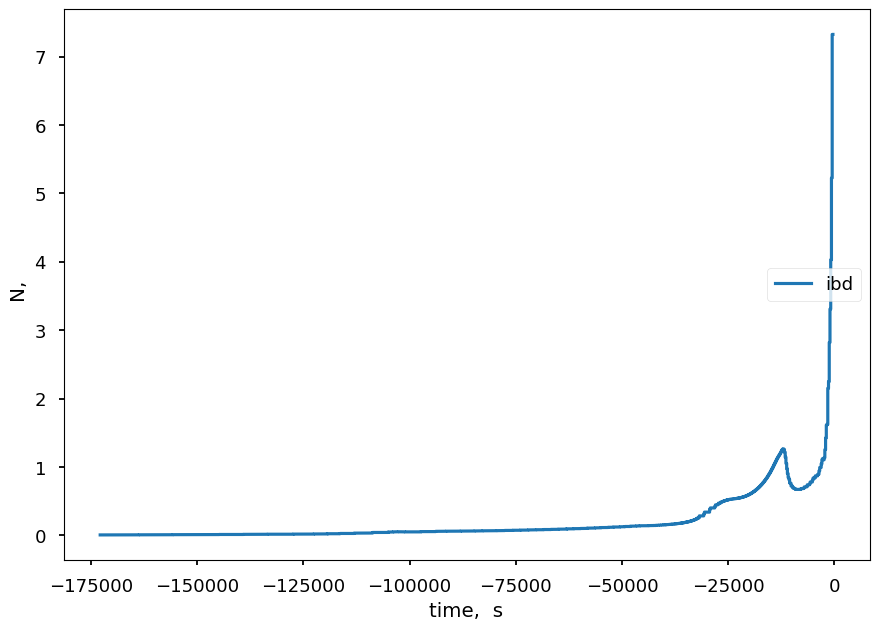

In [52]:
#First find total number IBD events at a specific distance (0.6 pc), 48 hours before collapse
flux = model.get_flux(t = times, E = energies, distance=0.6<<u.kpc)

#calculate time integral rate 
fluence = flux.integrate('time', np.arange(-172800,0,172.8)<<u.s) #Ida:changed the time in array
print(fluence)
#ratesI = rc.run(fluence, 'scint20kt')
ratesI['ibd']

for ch, rate in ratesI.items():
    if ch == 'ibd':
        l = plot_projection(rate, 'time', integrate=False, step=True)
        l[0].set_label(ch)

plt.legend(loc='right')
plt.show()

In [53]:
for ch, rate in ratesI.items():
    if ch == 'ibd':
        total_events = np.sum(rate)
    
print(total_events)
    

TypeError: _ContainerBase.sum() got an unexpected keyword argument 'out'